In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.optimize as so
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib import cm
from matplotlib.colors import LogNorm
import TransformCoords
import os

matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

import multiprocessing as mp

import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
def plot_roc_curves(folder_tag):
    folder = ""
    spec = ""
    if folder_tag.startswith("2"): folder = '/tigress/dropulic/G_train_2it_2000000_tanh_D30_nodropout_seed1test1_lbppp_log2d_2mil'
    else: 
        folder = '/tigress/dropulic/G_train_2it_500000_tanh_D30_nodropout_seed1test1_lbppp_log2d_'
        if folder_tag == 'dimtest': 
            folder = folder + 'dimtest'
            mean_color = "red"
            fill_color = "salmon"
        if folder_tag == 'highz': 
            folder = folder + 'highz'
            mean_color = "orange"
            fill_color = "coral"
    #import all curves with min and max in function then plot
    if folder_tag == '2mil_vlos0': 
        spec = 'vlos0_'
        mean_color = "blue"
    if folder_tag == '2mil_vlos0_15deg': 
        spec = 'vlos0_15deg_'
        mean_color = "magenta"
    if folder_tag == '2mil_15deg': 
        spec = '15deg_'
        mean_color = "purple"
        fill_color = "violet"
    if folder_tag == "2mil":
        mean_color = "green"
        fill_color = "mediumaquamarine"
    
    label_string_list = ["_vr_vphi_","_vr_vth_","_vth_vphi_"]
    met_string_list = ["high","low"]
    if (folder_tag != '2mil_vlos0') and (folder_tag != '2mil_vlos0_15deg'):
        for label_string in label_string_list:
            for met_string in met_string_list:
                min_y_i_list = np.load(folder+'/min_y_i_list'+label_string+spec+met_string+'.npz')
                min_y_i_list = min_y_i_list['arr_0']
                mean_y_i_list = np.load(folder+'/mean_y_i_list'+label_string+spec+met_string+'.npz')
                mean_y_i_list = mean_y_i_list['arr_0']
                max_y_i_list = np.load(folder+'/max_y_i_list'+label_string+spec+met_string+'.npz')
                max_y_i_list = max_y_i_list['arr_0']
                #print(mean_y_i_list.keys())
                #print(mean_y_i_list)
                if label_string == "_vr_vphi_" and met_string == "high":
                    #ax_x = 0
                    ax_y = 0
                    linestyle = '-'
                if label_string == "_vr_vphi_" and met_string == "low":
                    #ax_x = 0
                    ax_y = 0
                    linestyle = '-.'
                if label_string == "_vr_vth_" and met_string == "high":
                    #ax_x = 1
                    ax_y = 1
                    linestyle = '-'
                if label_string == "_vr_vth_" and met_string == "low":
                    #ax_x = 1
                    ax_y = 1
                    linestyle = '-.'
                if label_string == "_vth_vphi_" and met_string == "high":
                    #ax_x = 2
                    ax_y = 2
                    linestyle = '-'
                if label_string == "_vth_vphi_" and met_string == "low":
                    #ax_x = 2
                    ax_y = 2
                    linestyle = '-.'
                xnew = np.linspace(0,.99,100)
                x_calib = np.linspace(0,1,20)
                y_calib = np.linspace(0,1,20)
                ax[ax_y].plot(x_calib, y_calib, linestyle = '--', color = "black")
                ax[ax_y].plot(xnew[1:], mean_y_i_list, linestyle = linestyle, color = mean_color)
                ax[ax_y].fill_between(xnew[1:], min_y_i_list, max_y_i_list, where=max_y_i_list>=min_y_i_list, alpha = 0.5, color = fill_color)
                ax[ax_y].set_ylabel("Percent of Stars with True Value in the Volume", fontsize=10)
                if label_string == "_vth_vphi_":
                    ax[ax_y].set_xlabel("Percentage of Probability Volume", fontsize=10)
                if label_string == "_vr_vphi_":
                    ax[ax_y].set_xlabel("Percentage of Probability Volume", fontsize=10)
                if label_string == "_vr_vth_":
                    ax[ax_y].set_xlabel("Percentage of Probability Volume", fontsize=10)
    if (folder_tag == '2mil_vlos0') or (folder_tag == '2mil_vlos0_15deg'):
        print(spec)
        for label_string in label_string_list:
            for met_string in met_string_list:
                if not os.path.exists(folder+'/y_i_list'+label_string+spec+met_string+'notMC.npz'): continue;
                y_i_list = np.load(folder+'/y_i_list'+label_string+spec+met_string+'notMC.npz')
                y_i_list = y_i_list['arr_0']

                if label_string == "_vr_vphi_" and met_string == "high":
                    #ax_x = 0
                    ax_y = 0
                    linestyle = '-'
                if label_string == "_vr_vphi_" and met_string == "low":
                    #ax_x = 0
                    ax_y = 0
                    linestyle = '-.'
                if label_string == "_vr_vth_" and met_string == "high":
                    #ax_x = 1
                    ax_y = 1
                    linestyle = '-'
                if label_string == "_vr_vth_" and met_string == "low":
                   # ax_x = 1
                    ax_y = 1
                    linestyle = '-.'
                if label_string == "_vth_vphi_" and met_string == "high":
                    #ax_x = 2
                    ax_y = 2
                    linestyle = '-'
                if label_string == "_vth_vphi_" and met_string == "low":
                    #ax_x = 2
                    ax_y = 2
                    linestyle = '-.'
                xnew = np.linspace(0,.99,100)
                x_calib = np.linspace(0,1,20)
                y_calib = np.linspace(0,1,20)
                ax[ax_y].plot(x_calib, y_calib, linestyle = '--', color = "black")
                ax[ax_y].plot(xnew[1:], y_i_list, linestyle = linestyle, color = mean_color)
                if label_string == "_vth_vphi_":
                    ax[ax_y].set_xlabel("Percentage of Probability Volume", fontsize=10)
                if label_string == "_vr_vphi_":
                    ax[ax_y].set_xlabel("Percentage of Probability Volume", fontsize=10)
                if label_string == "_vr_vth_":
                    ax[ax_y].set_xlabel("Percentage of Probability Volume", fontsize=10)
                ax[ax_y].set_ylabel("Percent of Stars with True Value in the Volume", fontsize=10)
        
    solid_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='High [Fe/H] ($> -1$)')
    dashed_patch = Line2D([0], [0], color='black', linewidth=1, linestyle='-.', label='Low [Fe/H] ($< -1.5$)')
    red_patch = mpatches.Patch(color='red', label='500k stars, $G_{mag} > 13.0$')
    purple_patch = mpatches.Patch(color='purple', label='2M, $15^{\circ}$ cone')
    blue_patch = mpatches.Patch(color='blue', label='2M, $v_{los} = 0$ (Not MC)')
    green_patch = mpatches.Patch(color='green', label='2M')
    orange_patch = mpatches.Patch(color='orange', label='500k stars, $|z| > 2$')
    pink_patch = mpatches.Patch(color='magenta', label='2M, $v_{los} = 0$, $15^{\circ}$ cone (Not MC)')
    #plt.legend(handles=[red_patch,green_patch, purple_patch, blue_patch ,pink_patch,orange_patch], ncol = 1,prop={'size': 10})
    #plt.legend(handles=[solid_patch, dashed_patch,red_patch,green_patch,orange_patch], ncol = 1,prop={'size': 10})
    plt.legend(handles=[solid_patch, dashed_patch, green_patch,pink_patch], ncol = 1,prop={'size': 8})

    ax[0].set_title("$v_{r}, v_{\phi}$", fontsize=12)
    ax[1].set_title("$v_{r}, v_{\Theta}$", fontsize=12)   
    ax[2].set_title("$v_{\Theta}, v_{\phi}$", fontsize=12)
    

2mil
2mil_vlos0_15deg
vlos0_15deg_


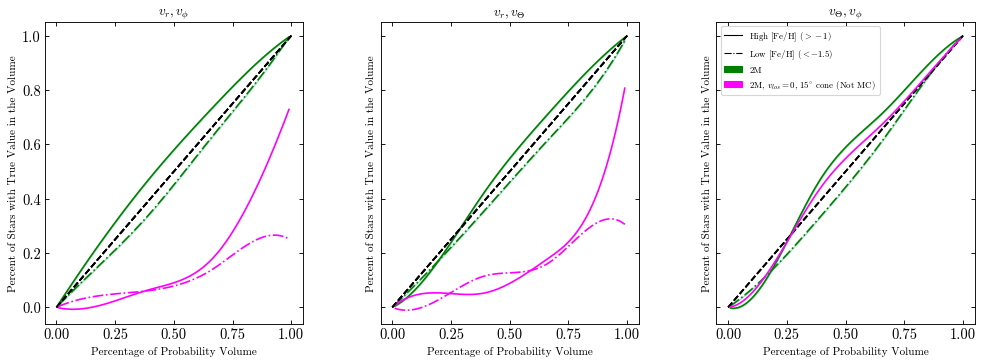

In [3]:
#folder_tag_array = ['highz','dimtest','2mil','2mil_15deg','2mil_vlos0_15deg','2mil_vlos0']
folder_tag_array = ['2mil','2mil_vlos0_15deg']
#folder_tag_array = ['highz','dimtest','2mil']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True,figsize=(15,5))   
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for folder_tag in folder_tag_array:
    print(folder_tag)
    plot_roc_curves(folder_tag)
plt.savefig("all_roc_curves_new.png")